In [1]:
#read the csv file.-Catarina

import pandas as pd
df= pd.read_csv('sales_dataset.csv')
print(df)

                Product Name     Category  Sale Price  Quantity Sold  \
0                   T-shirts     Clothing       10.99             20   
1               Levi's Jeans     Clothing       59.99             18   
2               Dyson Vacuum         Home      599.99              2   
3                 Sunglasses  Accessories       21.22             15   
4                 Headphones  Electronics        8.99             40   
5              Water bottles  Accessories       14.14             22   
6                  Backpacks  Accessories       18.99             27   
7                       Hats  Accessories       29.99             35   
8                      Books        Media       11.99             18   
9                       Toys         Toys       17.99             29   
10                    Apples         Food       10.99             32   
11                Lawn mower      Outdoor      123.99             24   
12            Samsung Galaxy  Electronics      899.99           

In [2]:
#calculate total sales for each product-Catarina

def calculate_total_sales(row):
    return row['Sale Price'] * row['Quantity Sold']

total_sales = df.groupby('Product Name').apply(calculate_total_sales).groupby(level=0).sum()

print(total_sales)

Product Name
Amazon Echo Dot              799.80
Apple Watch                 1599.96
Apples                       351.68
Backpacks                    512.73
Books                        215.82
Candles                       66.31
Cuisinart Food Processor     799.96
Dyson Vacuum                1199.98
Fitbit Charge 5             1349.91
Harry Potter                 399.75
Hats                        1049.65
Headphones                   359.60
Lawn mower                  2975.76
Levi's Jeans                1079.82
Lululemon Yoga Mat          1349.85
Michael Kors Handbag        2799.92
Nest Thermostat             1499.94
Ninja Blender               1299.90
Oakley Sunglasses           1799.88
Patagonia Fleece             719.94
Phone cases                  301.00
Picture frames                83.98
Samsung Galaxy              4499.95
Schwinn Exercise Bike       1499.97
Sonos Soundbar               799.99
Sony PlayStation 5          1999.96
Sunglasses                   318.30
T-shirts       

In [3]:
#calculate average sales price for each category-Ramya
def calculate_average_sales_for_category(row):
    return row['Total Sales by Category'] / row['Quantity Sold']
category_total_sales = df.groupby('Category').apply(calculate_total_sales).groupby(level=0).sum()
category_total_sales.name = 'Total Sales by Category'
category_total_items = df.groupby('Category')['Quantity Sold'].sum()
category_toal_sales_quantity = pd.concat([category_total_sales,category_total_items],axis=1)
category_average_price = category_toal_sales_quantity.apply(calculate_average_sales_for_category,axis=1)
#Rounding category average price to 2 d.p.
category_average_price = round(category_average_price,2)
print(category_average_price)

Category
Accessories     57.07
Clothing        39.45
Electronics    139.81
Fitness        155.55
Food            10.99
Home           349.99
Home decor       7.16
Kitchen        149.99
Media           14.32
Outdoor        123.99
Toys            17.99
dtype: float64


In [4]:
#Identifying the month with the highest sales and the month with the lowest sales-Muriel

#Calculating the total sales per month and displaying/printing it

#The required section of the dataframe has been saved to a new variable,total_sales_per_month
#Using the .groupby and .sum methods to calculate the sum of all the sales data by month 
#and the 'calculate_total_sales' function defined above

total_sales_per_month = df.groupby(['Month']).apply(calculate_total_sales).groupby(level=0).sum()
print(total_sales_per_month)

Month
April        3229.65
August       2395.03
December     6341.14
February     6499.66
July         5112.53
June         1851.62
March        2315.52
May          1339.24
November     5042.03
October       359.60
September    3899.53
dtype: float64


In [5]:
#Defining 2 new functions, high_sales and low_sales, 
#^to return the highest sales and lowest sales respectively
def high_sales():
    #this method finds the index of the maximum
    month_highest_sales = total_sales_per_month.idxmax()
    return(month_highest_sales)
def low_sales():
    #this method find the index of the minimum
    month_lowest_sales = total_sales_per_month.idxmin()
    return(month_lowest_sales)

print(high_sales())
print(low_sales())

February 
October


In [6]:
#Assigning the value of the maximum to a new variable, highest_sales
highest_sales = max(total_sales_per_month)
print(highest_sales)

#Assigning the value of the minimum to a new variable, lowest_sales
lowest_sales = min(total_sales_per_month)
print(lowest_sales)

6499.66
359.6


In [7]:
#Conclusion of analysis
print(f"The month with the highest sales was {high_sales()}with £{highest_sales}")
print(f"The month with the lowest sales was {low_sales()} with £{lowest_sales}")

The month with the highest sales was February with £6499.66
The month with the lowest sales was October with £359.6


In [8]:
# Which customers made the most purchases and how much they spent in total-Ranita
top_customers = df.groupby('Customer Name').sum().sort_values(by='Quantity Sold', ascending=False,).head(n=10)
top_customers['Total Sales'] = top_customers['Sale Price'] * top_customers['Quantity Sold']
top_customers = top_customers.drop('Sale Price', axis=1)
print(top_customers)
## Shows our top 10 customers in the order of most purchases and how much they have spent
## Our top customer is Emily Davis with 55 purchases, amounting to a total spending of £3848.90

                 Quantity Sold  Total Sales
Customer Name                              
Emily Davis                 55      3848.90
Amy Lee                     52      2294.76
Chris Brown                 50      6949.00
John Smith                  49     25821.53
Samantha Davis              46     17662.62
Michael Johnson             44     29082.68
Kimberly White              41      6887.18
Kelly Williams              30      3336.30
Mark Johnson                28     36736.84
Robert Johnson              28     14895.16


Text(0.5, 1.0, 'Top 10 Customers')

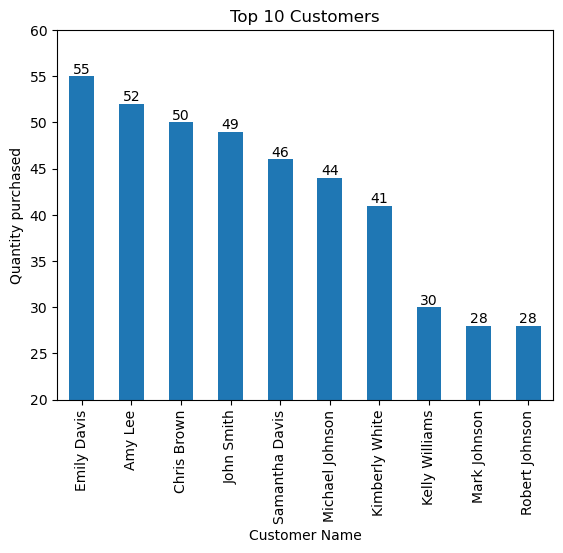

In [9]:
import matplotlib.pyplot as plt

#Plotting graphs based on the quantity of items the top 10 customers have purchased.
ax = top_customers["Quantity Sold"].plot.bar()
ax.set_ylim(20,60)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Customer Name")
ax.set_ylabel("Quantity purchased")
ax.set_title("Top 10 Customers")

Text(0.5, 1.0, 'Top 10 Customers Sales Total')

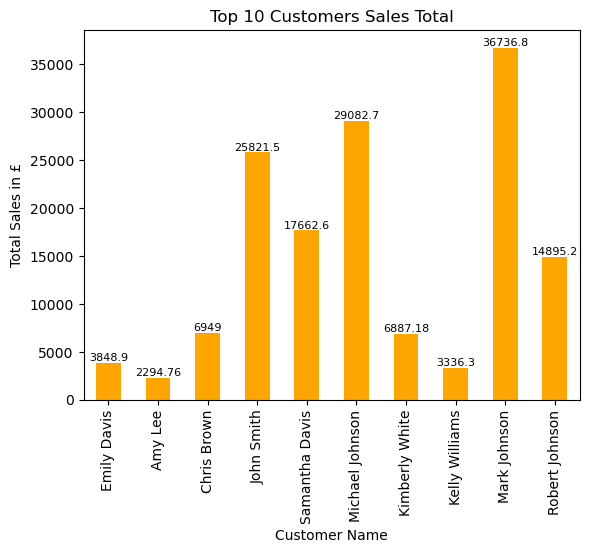

In [10]:
#Plotting graphs based on the total sales in £ made by the top 10 customers.

ax1 = top_customers["Total Sales"].plot.bar(color=['orange'])
ax1.bar_label(ax1.containers[0], fontsize=8)
ax1.set_xlabel("Customer Name")
ax1.set_ylabel("Total Sales in £")
ax1.set_title("Top 10 Customers Sales Total")

Text(0.5, 1.0, 'Average sales price per category')

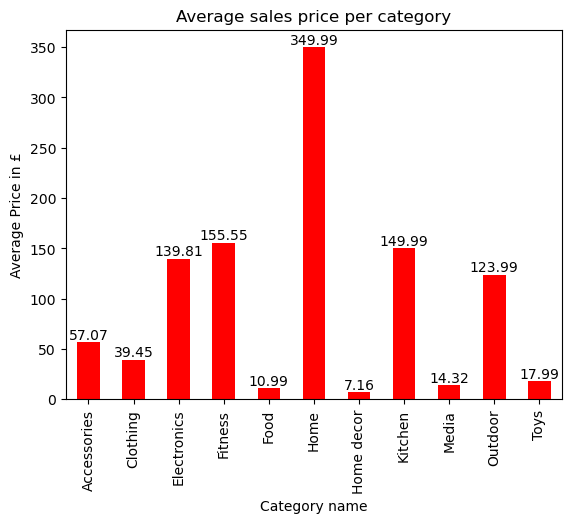

In [11]:
#Plotting of the graph based on average sales per item category.
ax2 = category_average_price.plot.bar(color=['red'])
ax2.bar_label(ax2.containers[0])
ax2.set_xlabel("Category name")
ax2.set_ylabel("Average Price in £")
ax2.set_title("Average sales price per category")

In [12]:
#Additional metrics-Catarina

#Median sale price.
median_sale_price = df['Sale Price'].median()
print(f'The median sale price is: {median_sale_price}')

#Standard deviation of sale prices.
std_sale_price = df['Sale Price'].std()
print(f'The standard deviation of sale price is: {std_sale_price}')

The median sale price is: 89.99
The standard deviation of sale price is: 307.9763734539895


In [20]:
#Writing the results of our analysis as a csv file- Muriel

#creating a new file called "sales_dataset_analysis_lime", and adding a title
import csv

filename = "sales_dataset_analysis_lime.csv"

#saving the title to a variable 
title = [["Team Lime's analysis of sales dataset"],
         [" "]]

with open(filename, 'w+', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(title)

In [21]:
#1 write total sales for each product to csv

fields = ["Product name", " Total sales"]

rows = [["Amazon Echo Dot", "799.80"],
        ["Apple Watch", "1599.96"],
        ["Apples", "351.68"],
        ["Backpacks", "512.73"],
        ["Books", "215.82"],
        ["Candles", "66.31"],
        ["Cuisinart Food Processor", "799.96"],
        ["Dyson Vacuum", "1199.98"],
        ["Fitbit Charge 5","1349.91"],
        ["Harry Potter", "399.75"],
        ["Hats","1049.65"],
        ["Headphones","359.60"],
        ["Lawn mower", "2975.76"],
        ["Levi's Jeans", "1079.82"],
        ["Lululemon Yoga Mat", "1349.85"],
        ["Michael Kors Handbag", "2799.92"],
        ["Nest Thermostat", "1499.94"],
        ["Ninja Blender", "1299.90"],
        ["Oakley Sunglasses", "1799.88"],
        ["Patagonia Fleece", "719.94"],
        ["Phone cases", "301.00"],
        ["Picture frames", "83.98"],
        ["Samsung Galaxy", "4499.95"],
        ["Schwinn Exercise Bike", "1499.97"],
        ["Sonos Soundbar", "799.99"],
        ["Sony PlayStation 5", "1999.96"],
        ["Sunglasses", "318.30"],
        ["T-shirts", "219.80"],
        ["Toys", "521.71"],
        ["Under Armour T-Shirt", "899.70"],
        ["Water bottles", "311.08"],
        ["iPhone 13", "3899.97"],
        ["iRobot Roomba Vacuum", "799.98"],
        [" "]]


with open(filename, 'a', newline='') as csvfiles:
    csvwriter = csv.writer(csvfiles)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

In [22]:
#2 write average sale price for each product category/category average price

fields = ["Product category", " Average sale price"]

rows = [["Accessories", "57.071933"],
        ["Clothing", "39.449459"],
        ["Electronics", "139.806176"],
        ["Fitness", "155.545556"],
        ["Food", "10.990000"],
        ["Home", "349.990000"],
        ["Home decor", "7.156667"],
        ["Kitchen", "149.9900002"],
        ["Media", "14.315581"],
        ["Outdoor", "123.990000"],
        ["Toys", "17.990000"],
        [" "]]


with open(filename, 'a', newline='') as csvfiles:
    csvwriter = csv.writer(csvfiles)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

In [23]:
#3 write the conclusion including the month with highest sales and month with lowest sales

lines = [["The month with the highest sales was February with £6499.66"],
         ["The month with the lowest sales was October with £359.6"],
         [" "]]

with open(filename, 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(lines)

In [24]:
#4 write the customers with the most purchases (top 10) and how much they spent in total

fields = ["Customer name", " Quantity bought",  " Amount spent"]
       
rows = [["Emily Davis", "55", "3848.90"],
        ["Amy Lee", "52", "2294.76"],
        ["Chris Brown", "50", "6949.00"],
        ["John Smith", "49", "25821.53"],
        ["Samantha Davis", "46", "17662.62"],
        ["Michael Johnson", "44", "29082.68"],
        ["Kimberly White", "41", "6887.18"],
        ["Kelly Williams", "30", "3336.30"],
        ["Mark Johnson", "28", "36736.84"],
        ["Robert Johnson", "28", "14895.16"],
        [" "]]

with open(filename, 'a', newline='') as csvfiles:
    csvwriter = csv.writer(csvfiles)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)

In [25]:
#additional metrics-write the mini conclusion for the median and standard deviation of sale prices

lines = [["The median sale price is: 89.99"],
         ["The standard deviation of sale price is: 307.9763734539895"]]

with open(filename, 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(lines)

In [26]:
#reading the csv file to check that the analysis has been written in correctly

with open(filename, 'r') as csv_file:
    analysis_sheet = csv.reader(csv_file)  
    contents = []
    for row in analysis_sheet:
        contents.append(row)
        print(row)

["Team Lime's analysis of sales dataset"]
[' ']
['Product name', ' Total sales']
['Amazon Echo Dot', '799.80']
['Apple Watch', '1599.96']
['Apples', '351.68']
['Backpacks', '512.73']
['Books', '215.82']
['Candles', '66.31']
['Cuisinart Food Processor', '799.96']
['Dyson Vacuum', '1199.98']
['Fitbit Charge 5', '1349.91']
['Harry Potter', '399.75']
['Hats', '1049.65']
['Headphones', '359.60']
['Lawn mower', '2975.76']
["Levi's Jeans", '1079.82']
['Lululemon Yoga Mat', '1349.85']
['Michael Kors Handbag', '2799.92']
['Nest Thermostat', '1499.94']
['Ninja Blender', '1299.90']
['Oakley Sunglasses', '1799.88']
['Patagonia Fleece', '719.94']
['Phone cases', '301.00']
['Picture frames', '83.98']
['Samsung Galaxy', '4499.95']
['Schwinn Exercise Bike', '1499.97']
['Sonos Soundbar', '799.99']
['Sony PlayStation 5', '1999.96']
['Sunglasses', '318.30']
['T-shirts', '219.80']
['Toys', '521.71']
['Under Armour T-Shirt', '899.70']
['Water bottles', '311.08']
['iPhone 13', '3899.97']
['iRobot Roomba Vac